## **Predict the final grade of Portugese high school students**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [43]:
init_columns = list(data.columns)
init_columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [44]:
data.shape

(395, 33)

In [45]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [46]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [48]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [49]:
X = data.iloc[:,:].values

Use lable encoding and onehot encoding to analyze categorical data
we have following columns as categorical data

0 - school

1 - sex

3 - address

4 - famsize

5 - Pstatus

8 - Mjob

9 - Fjob

10 - reason

11 - guardian

15 - schoolsup

16 - famsup

17 - paid

18 - activities

19 - nursery

20 - higher

21 - internet

22 - romantic


In [50]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)

X = X[:, 1:]

#print(X[1,:])


In [51]:
df1 = pd.DataFrame(X)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0,0,0,0,GP,F,18,U,GT3,A,4,4,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,0,0,0,GP,F,17,U,GT3,T,1,1,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,0,0,0,GP,F,15,U,LE3,T,1,1,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,0,0,0,GP,F,15,U,GT3,T,4,2,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,0,1,0,0,GP,F,16,U,GT3,T,3,3,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,1,0,MS,M,20,U,LE3,A,2,2,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,0,0,1,0,MS,M,17,U,LE3,T,3,1,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,0,1,0,0,MS,M,21,R,GT3,T,1,1,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,0,0,1,0,MS,M,18,R,LE3,T,3,2,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [52]:
columns = ['Mjob1','Mjob2','Mjob3','Mjob4','school','sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
                               'G1', 'G2', 'G3']
dct = {i: columns[i] for i in range(0, len(columns))} 
df1.rename(columns = dct,inplace = True)
#df.rename(columns={"A": "a", "B": "c"})
df1

,Mjob1,Mjob2,Mjob3,Mjob4,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,0,0,GP,F,18,U,GT3,A,4,4,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,0,0,0,GP,F,17,U,GT3,T,1,1,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,0,0,0,GP,F,15,U,LE3,T,1,1,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,0,0,0,GP,F,15,U,GT3,T,4,2,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,0,1,0,0,GP,F,16,U,GT3,T,3,3,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,1,0,MS,M,20,U,LE3,A,2,2,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,0,0,1,0,MS,M,17,U,LE3,T,3,1,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,0,1,0,0,MS,M,21,R,GT3,T,1,1,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,0,0,1,0,MS,M,18,R,LE3,T,3,2,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [53]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)

X = X[:, 1:]

In [54]:
columns = ['Fjob1','Fjob2','Fjob3','Fjob4','Mjob1','Mjob2','Mjob3','Mjob4','school','sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'reason', 'guardian', 'traveltime', 'studytime',
                              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
                               'G1', 'G2', 'G3']
dct = {i: columns[i] for i in range(0, len(columns))} 

df2 = pd.DataFrame(X)
df2

df2.rename(columns = dct,inplace = True)
#df.rename(columns={"A": "a", "B": "c"})
df2

,Fjob1,Fjob2,Fjob3,Fjob4,Mjob1,Mjob2,Mjob3,Mjob4,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,0,1,0,0,0,0,GP,F,18,U,GT3,A,4,4,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,1,0,0,0,0,0,0,GP,F,17,U,GT3,T,1,1,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,1,0,0,0,0,0,0,GP,F,15,U,LE3,T,1,1,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,0,0,1,0,1,0,0,0,GP,F,15,U,GT3,T,4,2,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,0,1,0,0,0,1,0,0,GP,F,16,U,GT3,T,3,3,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,1,0,0,0,1,0,MS,M,20,U,LE3,A,2,2,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,0,0,1,0,0,0,1,0,MS,M,17,U,LE3,T,3,1,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,0,1,0,0,0,1,0,0,MS,M,21,R,GT3,T,1,1,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,0,1,0,0,0,0,1,0,MS,M,18,R,LE3,T,3,2,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [55]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [16])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)

X = X[:, 1:]

In [56]:
columns = ['reason1','reason2','reason3','Fjob1','Fjob2','Fjob3','Fjob4','Mjob1','Mjob2','Mjob3','Mjob4','school','sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'guardian', 'traveltime', 'studytime',
                              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
                               'G1', 'G2', 'G3']
dct = {i: columns[i] for i in range(0, len(columns))} 

df2 = pd.DataFrame(X)

df2.rename(columns = dct,inplace = True)
#df.rename(columns={"A": "a", "B": "c"})
df2

,reason1,reason2,reason3,Fjob1,Fjob2,Fjob3,Fjob4,Mjob1,Mjob2,Mjob3,Mjob4,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,0,0,0,0,1,0,0,0,0,GP,F,18,U,GT3,A,4,4,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,0,0,0,1,0,0,0,0,0,0,GP,F,17,U,GT3,T,1,1,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,1,0,0,1,0,0,0,0,0,0,GP,F,15,U,LE3,T,1,1,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,0,0,0,0,1,0,1,0,0,0,GP,F,15,U,GT3,T,4,2,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,0,0,0,1,0,0,0,1,0,0,GP,F,16,U,GT3,T,3,3,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,0,0,0,1,0,0,0,1,0,MS,M,20,U,LE3,A,2,2,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,0,0,0,0,0,1,0,0,0,1,0,MS,M,17,U,LE3,T,3,1,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,0,0,0,0,1,0,0,0,1,0,0,MS,M,21,R,GT3,T,1,1,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,0,0,0,0,1,0,0,0,0,1,0,MS,M,18,R,LE3,T,3,2,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [57]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [19])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)

X = X[:, 1:]

In [58]:
columns = ['guardian1','guardian2','reason1','reason2','reason3','Fjob1','Fjob2','Fjob3','Fjob4','Mjob1','Mjob2','Mjob3','Mjob4','school','sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime',
                              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
                               'G1', 'G2', 'G3']
dct = {i: columns[i] for i in range(0, len(columns))} 

df2 = pd.DataFrame(X)

df2.rename(columns = dct,inplace = True)
#df.rename(columns={"A": "a", "B": "c"})
df2

,guardian1,guardian2,reason1,reason2,reason3,Fjob1,Fjob2,Fjob3,Fjob4,Mjob1,Mjob2,Mjob3,Mjob4,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,0,0,0,0,0,1,0,0,0,0,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,0,0,0,0,0,1,0,0,0,0,0,0,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,0,0,1,0,0,1,0,0,0,0,0,0,GP,F,15,U,LE3,T,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,0,1,0,0,0,0,1,0,1,0,0,0,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,0,0,1,0,0,0,1,0,0,0,1,0,0,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,0,0,0,0,1,0,0,0,1,0,MS,M,20,U,LE3,A,2,2,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,1,0,0,0,0,0,0,1,0,0,0,1,0,MS,M,17,U,LE3,T,3,1,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,0,1,0,0,0,0,1,0,0,0,1,0,0,MS,M,21,R,GT3,T,1,1,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,1,0,0,0,0,0,1,0,0,0,0,1,0,MS,M,18,R,LE3,T,3,2,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [59]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEncoder = LabelEncoder()
X[:,13] = labelEncoder.fit_transform(X[:, 13])
X[:,14] = labelEncoder.fit_transform(X[:,14])
X[:,16] = labelEncoder.fit_transform(X[:,16])
X[:,17] = labelEncoder.fit_transform(X[:,17])
X[:,18] = labelEncoder.fit_transform(X[:,18])
X[:,24] = labelEncoder.fit_transform(X[:,24])
X[:,25] = labelEncoder.fit_transform(X[:,25])
X[:,26] = labelEncoder.fit_transform(X[:,26])
X[:,27] = labelEncoder.fit_transform(X[:,27])
X[:,28] = labelEncoder.fit_transform(X[:,28])
X[:,29] = labelEncoder.fit_transform(X[:,29])
X[:,30] = labelEncoder.fit_transform(X[:,30])
X[:,31] = labelEncoder.fit_transform(X[:,31])



In [60]:
data = pd.DataFrame(data = X,columns = columns)
data

,guardian1,guardian2,reason1,reason2,reason3,Fjob1,Fjob2,Fjob3,Fjob4,Mjob1,Mjob2,Mjob3,Mjob4,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,20,1,1,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9
391,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16
392,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,21,0,0,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,18,0,1,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10


## **Data Visualization**

In [239]:
#sns.pairplot(data)

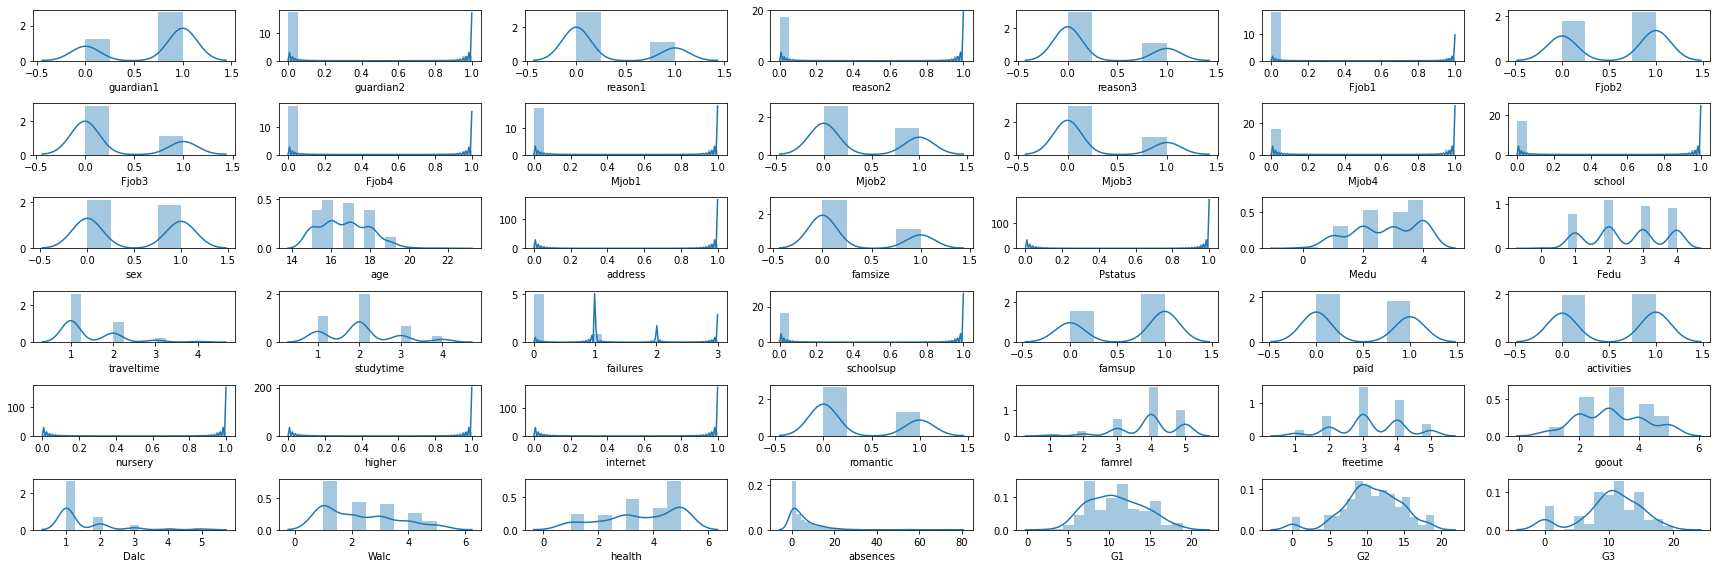

In [240]:

rows = 6
cols = 7

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (24,8))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

In [244]:
type(data)

pandas.core.frame.DataFrame

In [245]:
X = data['G2']

In [246]:
type(X)

pandas.core.series.Series

In [252]:
for i in data.columns:
    temp = data[i]
    #print(type(temp))
    temp = pd.to_numeric(temp)
    data[i] = temp


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   guardian1   395 non-null    float64
 1   guardian2   395 non-null    float64
 2   reason1     395 non-null    float64
 3   reason2     395 non-null    float64
 4   reason3     395 non-null    float64
 5   Fjob1       395 non-null    float64
 6   Fjob2       395 non-null    float64
 7   Fjob3       395 non-null    float64
 8   Fjob4       395 non-null    float64
 9   Mjob1       395 non-null    float64
 10  Mjob2       395 non-null    float64
 11  Mjob3       395 non-null    float64
 12  Mjob4       395 non-null    float64
 13  school      395 non-null    int64  
 14  sex         395 non-null    int64  
 15  age         395 non-null    int64  
 16  address     395 non-null    int64  
 17  famsize     395 non-null    int64  
 18  Pstatus     395 non-null    int64  
 19  Medu        395 non-null    i

In [258]:
corrmat = data.corr()
corrmat

,guardian1,guardian2,reason1,reason2,reason3,Fjob1,Fjob2,Fjob3,Fjob4,Mjob1,Mjob2,Mjob3,Mjob4,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
guardian1,1.000000,-0.444143,-0.065389,0.021304,-0.019469,-0.064122,0.154429,-0.130637,-0.000904,-0.048816,-0.096649,-0.014818,0.153480,-0.064783,-0.013642,-0.133558,-0.081376,0.026727,-0.065813,0.112375,-0.047265,-0.057669,-0.024031,-0.134498,-0.004054,-0.014124,0.064926,0.022809,0.108332,-0.004429,-0.020340,-0.037525,-0.010983,-0.028979,0.080236,-0.051224,0.006471,-0.025096,0.023638,-0.011767,-0.014442,0.022338
guardian2,-0.444143,1.000000,0.086550,-0.029545,0.010368,-0.020387,0.026485,0.020799,-0.083576,-0.024957,0.030545,0.013857,-0.070746,0.065759,-0.058525,0.398396,0.025177,-0.025298,-0.051061,-0.118635,-0.091250,0.048758,0.031724,0.291157,-0.058982,0.007522,-0.012352,-0.042382,-0.170929,-0.016071,-0.041116,0.124045,0.049548,0.069438,-0.012380,0.037626,-0.045563,-0.045049,0.140826,-0.031022,-0.073712,-0.087774
reason1,-0.065389,0.086550,1.000000,-0.195494,-0.371472,-0.053422,0.024121,-0.007943,-0.021770,-0.007719,0.095650,-0.044154,-0.000081,-0.029905,0.049883,0.018283,0.153580,-0.005728,-0.031310,-0.008708,-0.009618,-0.080027,-0.039620,0.042511,-0.001240,0.002561,0.080175,-0.050595,0.018964,0.065072,0.048775,0.030914,-0.012201,-0.083249,-0.004410,0.022726,0.005574,-0.001766,0.111061,-0.017198,0.004798,-0.021359
reason2,0.021304,-0.029545,-0.195494,1.000000,-0.190546,0.057341,-0.119815,0.075999,0.079490,0.090990,-0.089058,0.032310,-0.031962,0.131836,0.016859,0.027172,-0.041850,-0.026982,0.021247,0.008229,-0.014364,-0.001662,-0.107842,-0.012203,-0.017001,-0.073234,0.061857,-0.023208,-0.013458,-0.127472,-0.023221,0.074026,-0.019595,0.039891,-0.015182,0.155076,0.092452,0.006592,-0.003873,-0.007215,0.042846,0.052008
reason3,-0.019469,0.010368,-0.371472,-0.190546,1.000000,0.115828,0.026680,-0.044703,-0.037547,0.080952,0.030130,0.034201,-0.039145,-0.129128,-0.111434,-0.031932,-0.077227,-0.003842,-0.001903,0.106487,0.048724,-0.033322,0.193342,-0.070127,0.024661,0.113767,0.067699,0.132624,0.050127,0.086686,0.039084,-0.025374,-0.000972,-0.050101,-0.038297,-0.119213,-0.082733,-0.145337,0.070671,0.099522,0.087008,0.095692
Fjob1,-0.064122,-0.020387,-0.053422,0.057341,0.115828,1.000000,-0.241260,-0.136605,-0.061507,0.192628,-0.112126,-0.019179,0.046540,-0.079329,-0.061306,-0.109842,0.058641,0.021568,-0.045041,0.083398,0.163216,-0.088277,0.121107,-0.016593,0.096873,0.098983,0.067047,-0.003873,0.050847,0.050462,-0.032293,-0.000391,-0.013521,-0.063738,-0.021394,-0.036273,-0.068333,0.078859,-0.004191,0.035303,0.039259,0.057111
Fjob2,0.154429,0.026485,0.024121,-0.119815,0.026680,-0.241260,1.000000,-0.690275,-0.310798,-0.030450,0.281851,-0.169024,-0.156167,-0.067746,0.033307,0.007682,-0.056929,0.015408,-0.007940,-0.109887,-0.253605,0.093214,-0.040619,-0.037792,-0.045790,-0.020334,0.015977,-0.055193,-0.081931,0.046121,-0.064674,-0.059505,0.017534,0.040338,0.047488,-0.076526,0.050724,-0.001141,0.016664,-0.113924,-0.089285,-0.053483
Fjob3,-0.130637,0.020799,-0.007943,0.075999,-0.044703,-0.136605,-0.690275,1.000000,-0.175979,0.008947,-0.183657,0.180310,0.042985,0.106639,0.005083,0.042963,0.023404,-0.012871,0.083496,-0.031834,0.021306,-0.030232,0.007162,0.082706,-0.039163,-0.069429,0.001545,0.073416,-0.003320,-0.086822,0.098841,0.022762,0.051461,-0.051570,-0.010554,0.111475,0.090568,-0.038703,0.012907,-0.015093,0.028117,-0.016108
Fjob4,-0.000904,-0.083576,-0.021770,0.079490,-0.037547,-0.061507,-0.310798,-0.175979,1.000000,-0.051779,-0.088168,0.009683,0.212309,-0.041674,0.044147,-0.069993,0.010748,-0.072183,-0.063327,0.259836,0.347203,0.014004,-0.058225,-0.074377,0.065294,0.064417,-0.064065,-0.014697,0.046804,0.020735,-0.030037,0.026933,-0.069204,0.001675,-0.018830,0.000552,-0.093898,0.020423,-0.024964,0.168782,0.096364,0.095374
Mjob1,-0.048816,-0.024957,-

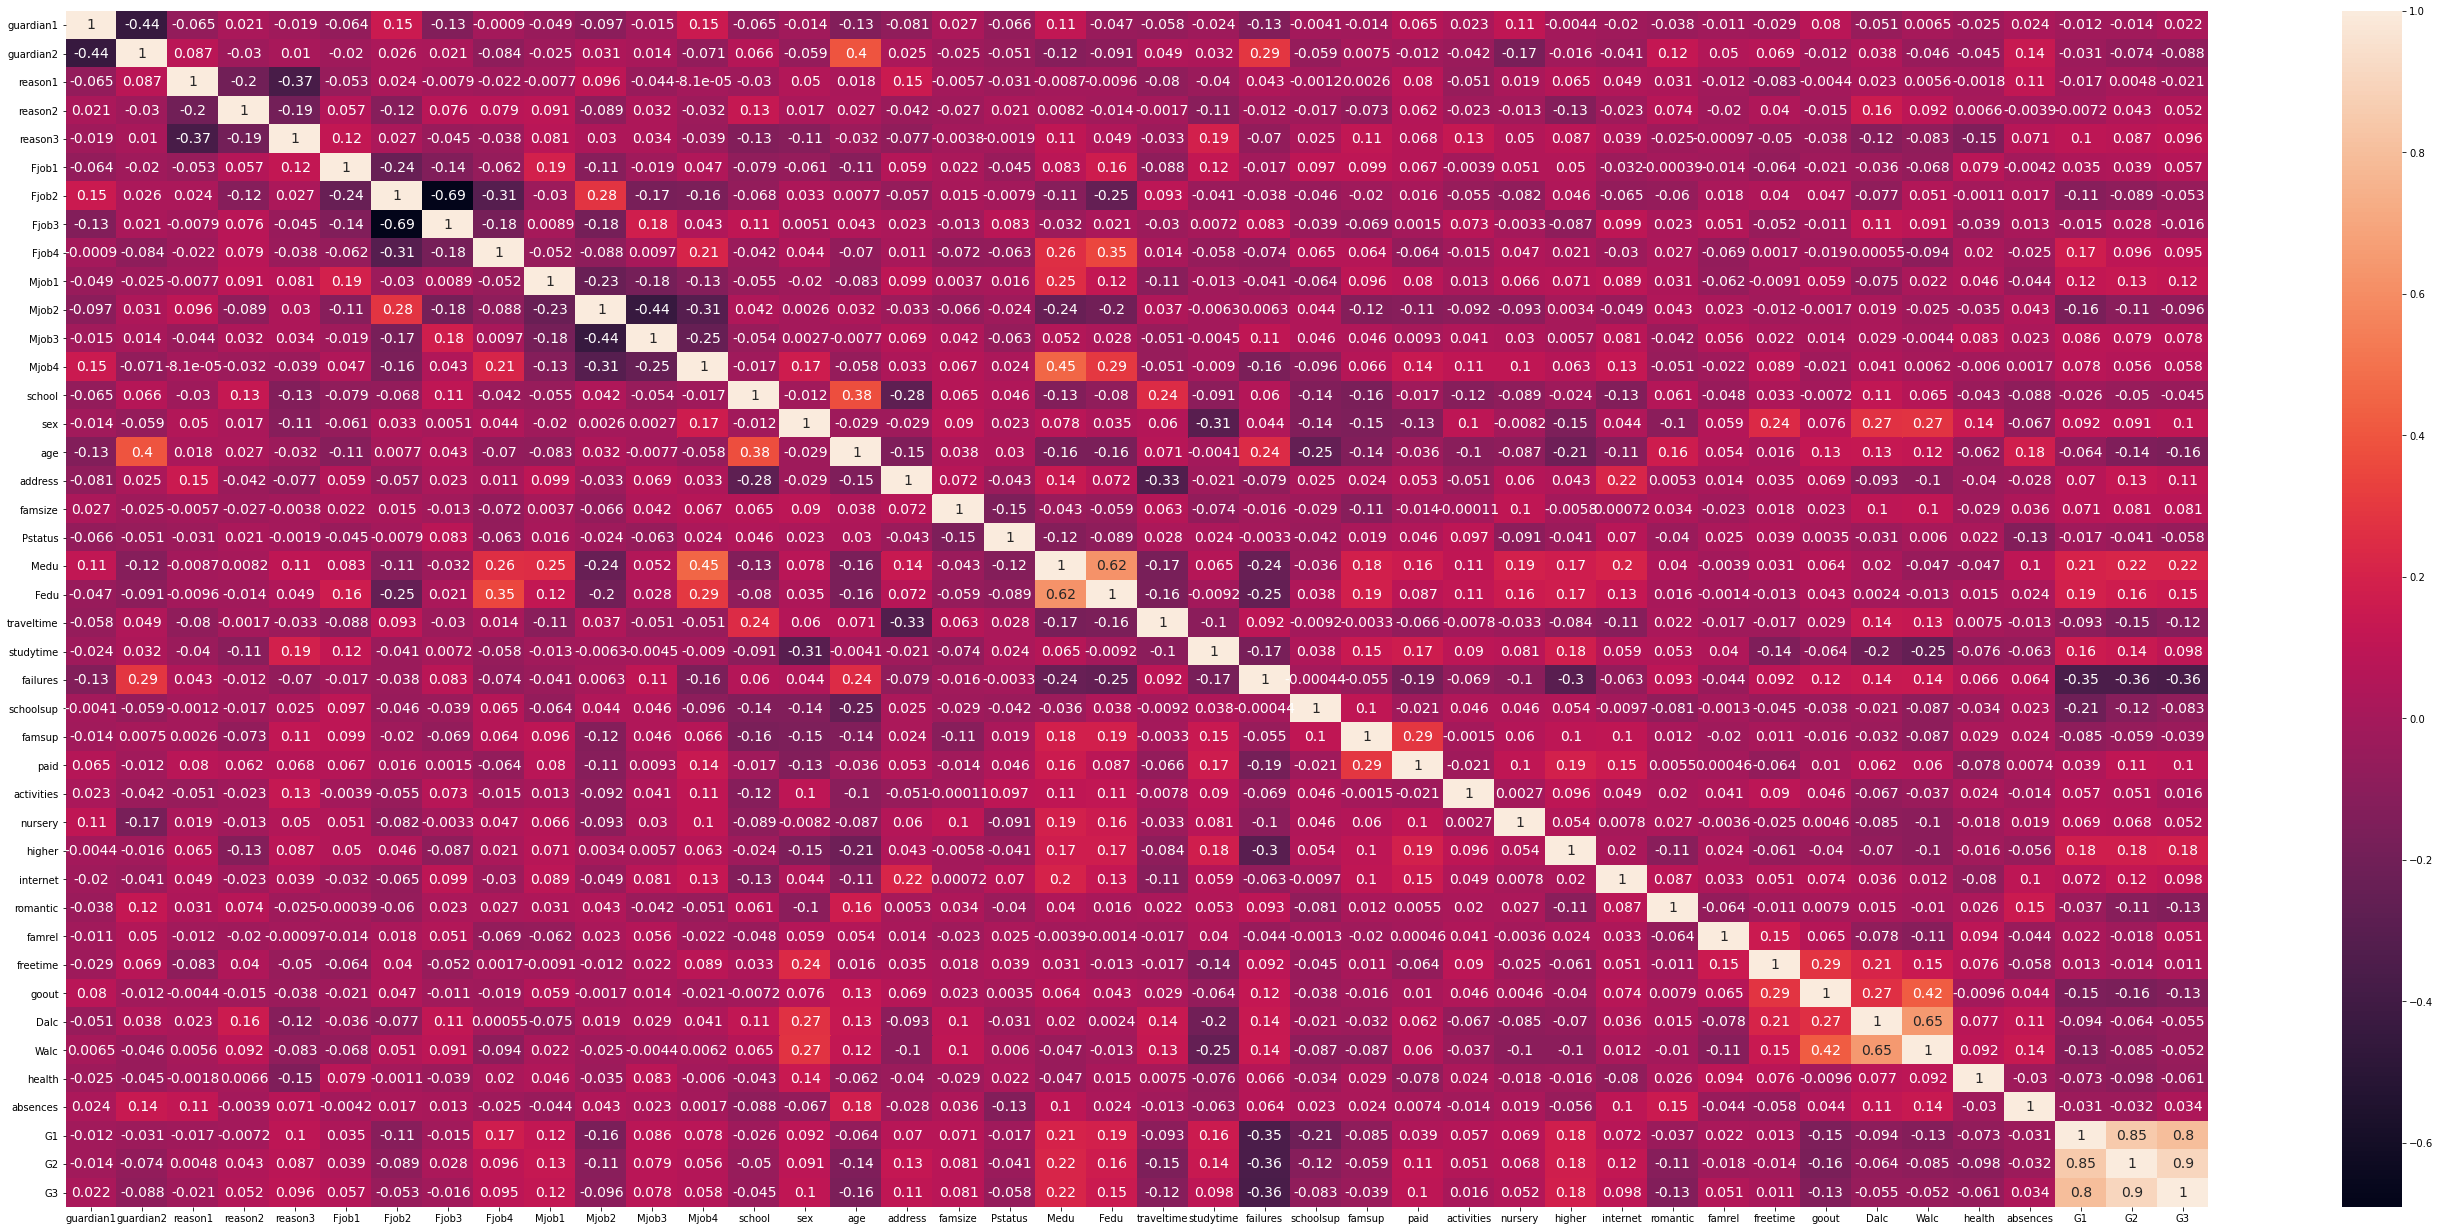

In [261]:
fig, ax = plt.subplots(figsize = (48,22))
sns.heatmap(corrmat, annot = True, annot_kws = {'size':14})

In [274]:
def getCorrelaredFeatures(corrdata, threshold):
    features = []
    values = []

    for i, index in enumerate(corrdata.index):
        if(abs(corrdata[index])>threshold):
            features.append(index)
            values.append(corrdata[index])

    df = pd.DataFrame(data = values, index = features, columns = ['Corr_Value'])
    return df

In [275]:
threshold = 0.5
corr_value = getCorrelaredFeatures(corrdata = corrmat['G3'], threshold = threshold)
corr_value

,Corr_Value
G1,0.801468
G2,0.904868
G3,1.000000


In [282]:
correlated_data = data[corr_value.index]
correlated_data

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
390,9,9,9
391,14,16,16
392,10,8,7
393,11,12,10


## **Pair plot and heat map for correlated data**

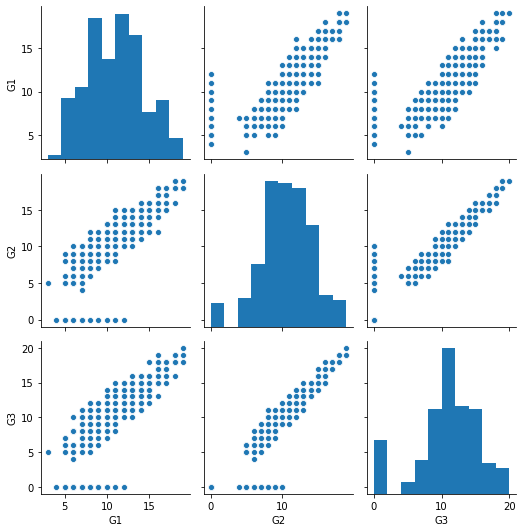

In [287]:
sns.pairplot(correlated_data)
plt.tight_layout()

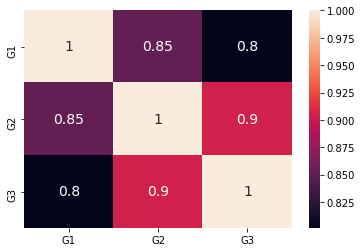

In [286]:
sns.heatmap(correlated_data.corr(), annot = True, annot_kws = {'size':14})

## **Shuffle and Split data**

In [292]:
X = correlated_data.drop('G3',axis = 1)
X.columns

Index(['G1', 'G2'], dtype='object')

In [289]:
y = correlated_data['G3']
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import learning_curve, ShuffleSplit

In [307]:
total_features = []
feature_names = []
threshold_value = []
r2_scores = []
mae_values = []
mse_values = []
    

In [314]:
def model(corr_data,threshold):

    corr_value = getCorrelaredFeatures(corr_data['G3'],threshold)
    print(corr_value.index)

    correlated_data = data[corr_value.index]

    X = correlated_data.drop('G3',axis = 1)
    y = correlated_data['G3']

    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    sRegressor = LinearRegression(normalize = True)
    sRegressor.fit(X_train,y_train)

    y_predict = sRegressor.predict(X_test)

    r2_sc = r2_score(y_test,y_predict)
    mse = mean_squared_error(y_test,y_predict)
    mae = mean_absolute_error(y_test,y_predict)

    total_features.append(str(X.shape[1]))
    feature_names.append(str(X.columns))
    threshold_value.append(threshold)
    r2_scores.append(r2_sc)
    mse_values.append(mse)
    mae_values.append(mae)

    metrics = pd.DataFrame(data = [total_features,feature_names,threshold_value,r2_scores,mse_values,mae_values],index = ['#features','Features','Threshold Value','r2 score','mse value','mae value'])

    return metrics.T

In [317]:
model(corrmat,0.7)

Index(['G1', 'G2', 'G3'], dtype='object')


,#features,Features,Threshold Value,r2 score,mse value,mae value
0,14,"Index(['Mjob1', 'sex', 'age', 'address', 'Medu...",0.1,0.799688,5.52637,1.36386
1,2,"Index(['G1', 'G2'], dtype='object')",0.5,0.802724,5.44261,1.30632
2,2,"Index(['G1', 'G2'], dtype='object')",0.7,0.802724,5.44261,1.30632
3,1,"Index(['G2'], dtype='object')",0.9,0.795695,5.63653,1.32601
4,41,"Index(['guardian1', 'guardian2', 'reason1', 'r...",0,0.788132,5.84519,1.61033
5,41,"Index(['guardian1', 'guardian2', 'reason1', 'r...",0,0.788132,5.84519,1.61033
6,1,"Index(['G2'], dtype='object')",0.9,0.795695,5.63653,1.32601
7,2,"Index(['G1', 'G2'], dtype='object')",0.7,0.802724,5.44261,1.30632


Since they are already normalized values, even after applying normaliation the values are same

In [325]:
def plot_learning_curve(estimator, title, X, y, cv, njobs, ylim, train_sizes = np.linspace(.1,1.0,10)):

    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Scores')

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = njobs, train_sizes = train_sizes)

    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores,axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')

    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'Cross-Validation Score')

    plt.legend(loc = 'best')
    return plt

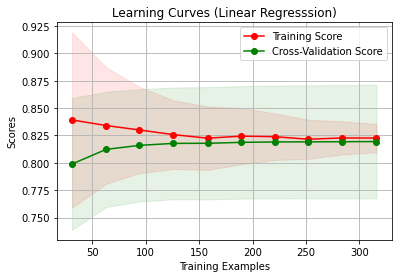

In [326]:
X = correlated_data.drop(labels = ['G3'], axis = 1)
y = correlated_data['G3']

title = 'Learning Curves (Linear Regresssion)'
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)
estimator = LinearRegression()

plot_learning_curve(estimator = estimator,title = title,X = X,y = y,cv = cv,njobs = 4, ylim = (0.7, 1.01))
plt.show()